In [131]:
import pandas as pd, numpy as np

In [132]:
# Intiializes data
data = pd.read_csv("clint.csv").drop("Unnamed: 0", 1)
stop = open("stop-word-list.txt").read().splitlines()
data = data[data.message.notnull()]

In [133]:
import datetime

# Removes the punctuations from the data set
punctuation_chars = ".,!?:;\"'-~|[]()/\\\n"

messages = data.message.str.lower()
def remove_punctuations(s):
    s = ''.join([i for i in s if i not in frozenset(punctuation_chars)])
    return s

data['minute'] = [datetime.datetime.fromtimestamp(x/1000).strftime('%m/%d %H:%M') for x in data.timestamp]
data

,color,command,deleted,from,message,room,timestamp,video-offset,badges,bits,...,room-id,sent-ts,style,subscriber,system-msg,tmi-sent-ts,turbo,user-id,user-type,minute
0,#2612BA,NaN,False,jtsnow77,PogChamp,clintstevens,1492400397504,504,"subscriber/12,turbo/1",NaN,...,86268118,1.492400e+12,NaN,True,NaN,1492400411953,True,109086033,NaN,04/16 23:39
1,#008000,NaN,False,posionpancake,PogChamp,clintstevens,1492400397903,903,NaN,NaN,...,86268118,1.492400e+12,NaN,False,NaN,1492400412324,False,57027344,NaN,04/16 23:39
2,#DAA520,NaN,False,thirteenjhm13,PogChamp,clintstevens,1492400397909,909,subscriber/3,NaN,...,86268118,1.492400e+12,NaN,True,NaN,1492400412358,False,35950973,NaN,04/16 23:39
3,#8A2BE2,NaN,False,greedisgo0d,HeyGuys,clintstevens,1492400400077,3077,NaN,NaN,...,86268118,1.492400e+12,NaN,False,NaN,1492400414521,False,131137126,NaN,04/16 23:40
4,NaN,NaN,False,wondl,WOOOOO,clintstevens,1492400400204,3204,bits/100,NaN,...,86268118,1.492400e+12,NaN,False,NaN,1492400414643,False,143565518,NaN,04/16 23:40
5,#CD9FFE,NaN,False,springysheep,HI CLINT,clintstevens,1492400400918,3918,bits/1000,NaN,...,86268118,1.492400e+12,NaN,False,NaN,1492400415321,False,111283120,NaN,04/16 23:40
6,#1E90FF,NaN,False,alphador_,PogChamp,clintstevens,1492400401903,4903,premium/1,NaN,...,86268118,1.492400e+12,NaN,False,NaN,1492400416367,False,139757133,NaN,04/16 23:40
7,#E6C300,NaN,False,chuckthegypsy,hi clint,clintstevens,1492400402355,5355,"subscriber/12,premium/1",NaN,...,86268118,1.492400e+12,NaN,True,NaN,1492400416795,False,27862377,NaN,04/16 23:40
8,#FF0000,NaN,False,not_a_speedrunner,yee,clintstevens,1492400404154,7154,NaN,NaN,...,86268118,1.492400e+12,NaN,False,NaN,1492400418611,False,94120565,NaN,04/16 23:40
9,#725E4B,NaN,False,laboonm,hes alive,clintstevens,1492400404822,7822,subscriber/6,NaN,...,86268118,1.492400e+12,NaN,True,NaN,1492400419259,False,76465212,NaN,04/16 23:40


In [134]:
# Groups each message with the corresponding date
g = data.groupby(['minute'])
messages = g.message.aggregate(' '.join)
messages = messages.str.lower()
messages = messages.apply(remove_punctuations).str.split()
messages = messages.apply(lambda x: 
        [w for w in x if w.isalpha() and w not in stop])
messages

minute
04/16 23:39                       [pogchamp, pogchamp, pogchamp]
04/16 23:40    [heyguys, wooooo, hi, clint, pogchamp, hi, cli...
04/16 23:41    [curly, ready, play, ow, sweet, ill, home, lik...
04/16 23:42    [hi, pogchamp, hello, clint, chat, nigga, play...
04/16 23:43    [sombra, main, o, shit, wr, pace, hey, abss, r...
04/16 23:44    [eyyyyyyyyyyyy, liriks, racist, liriks, dicks,...
04/16 23:45    [hey, clint, secret, cia, meetings, wait, did,...
04/16 23:46    [lul, make, sure, room, really, dark, sleep, r...
04/16 23:47    [fapfapfap, sex, mile, like, miutes, ur, day, ...
04/16 23:48    [koncha, sucked, trihard, cheepcheep, happy, e...
04/16 23:49    [feelsbadman, dont, listen, clintchoco, love, ...
04/16 23:50    [min, split, cheepcheep, yes, actually, hang, ...
04/16 23:51    [hey, clint, set, ac, roommates, like, f, did,...
04/16 23:52    [l, l, b, t, c, h, manage, himself, lul, mic, ...
04/16 23:53    [shitty, prebuilt, hp, lul, lul, gold, manager...
04/16 23:54    [ch

In [135]:
# Computes TF matrix, reduces the matrix by removing all NaNs; computes IDF vector and TD-IDF matrix
TF = messages.apply(lambda x: pd.Series(x).value_counts())
TF = TF.loc[:,TF.sum() > 2]
IDF = np.log10( float(len(TF))/TF.count() )
TFIDF = TF*IDF

vocab = TFIDF.columns
vocab

Index(['able', 'accent', 'accept', 'account', 'ace', 'acting', 'actual',
       'actually', 'add', 'added',
       ...
       'youve', 'yup', 'zelda', 'zero', 'zfg', 'zfgspeedpolice', 'zombie',
       'zoras', 'ˢᵗᵉᵇᵉᶰ', 'ᶜᶫᶦᶰᵈ'],
      dtype='object', length=1704)

In [136]:
# print results:
print(TFIDF.shape)
    
print(TF.sum().sort_values(ascending=False)[:10])
print(TFIDF.sum().sort_values(ascending=False)[:10])

print((TFIDF.max(1).idxmax(), TFIDF.max(0).idxmax()), TFIDF.max().max())

(196, 1704)
clintfug      2131.0
clintc        1557.0
clintcheep    1218.0
lul           1158.0
clintm        1007.0
clint          993.0
trihard        892.0
cheepcheep     583.0
pogchamp       543.0
clintrem       443.0
dtype: float64
clintc        549.211227
trihard       433.579879
clintcheep    388.698169
clintrem      315.625306
cheepcheep    246.623197
clintgreen    234.659380
clintm        207.337514
clintchoco    192.053887
clintk        185.983937
clintfug      170.625903
dtype: float64
('04/17 00:48', 'clintc') 173.193778


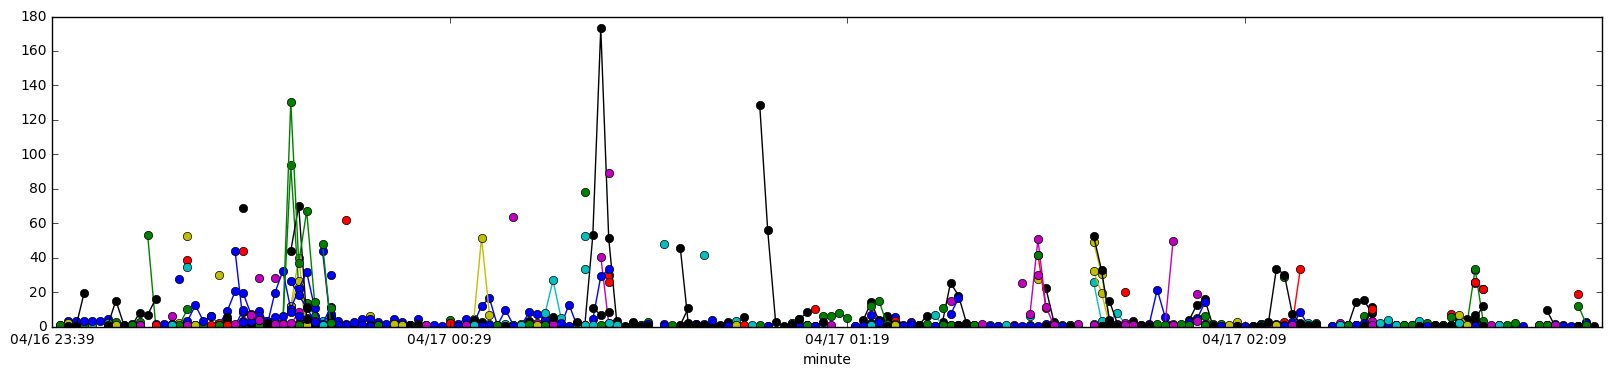

In [137]:
%matplotlib inline

# Graphing the peak events
TFIDF.loc[:,TFIDF.max() > 25].plot(figsize=(20,4),legend=False, marker='o')

In [138]:
# Important words of the day
TFIDF.idxmax(axis=1)

minute
04/16 23:39        pogchamp
04/16 23:40              hi
04/16 23:41       overwatch
04/16 23:42          pharah
04/16 23:43         trihard
04/16 23:44         meeting
04/16 23:45          begwan
04/16 23:46             fap
04/16 23:47           cross
04/16 23:48            lame
04/16 23:49            chad
04/16 23:50          clintc
04/16 23:51           bitch
04/16 23:52         trihard
04/16 23:53      cheepcheep
04/16 23:54      cheepcheep
04/16 23:55        approved
04/16 23:56          tentxd
04/16 23:57      feelsmakar
04/16 23:58       producers
04/16 23:59      clintchoco
04/17 00:00           elena
04/17 00:01      cheepcheep
04/17 00:02      feelsmakar
04/17 00:03           eyesh
04/17 00:04        innocent
04/17 00:05           duddy
04/17 00:06          wechey
04/17 00:07           duddy
04/17 00:08          clintm
                   ...     
04/17 02:25         trihard
04/17 02:26             kys
04/17 02:27             bob
04/17 02:28           slide
04/17 02:29  

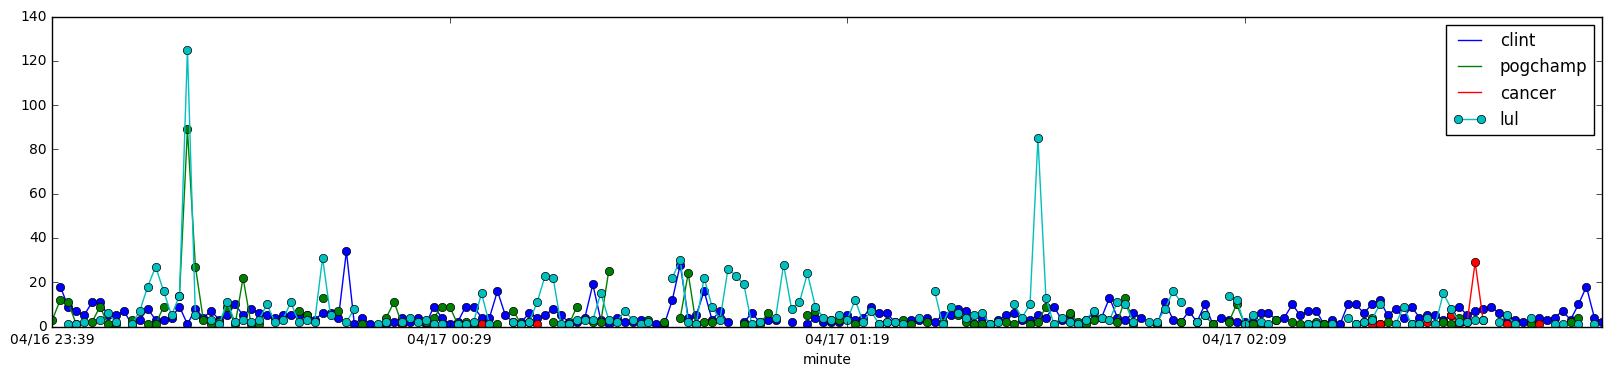

In [142]:
TF.clint.plot(figsize=(20,4),legend=True, marker='o')
TF.pogchamp.plot(figsize=(20,4),legend=True, marker='o')
TF.cancer.plot(figsize=(20,4), legend=True, marker='o')
TF.lul.plot(figsize=(20,4), legend=True, marker='o')

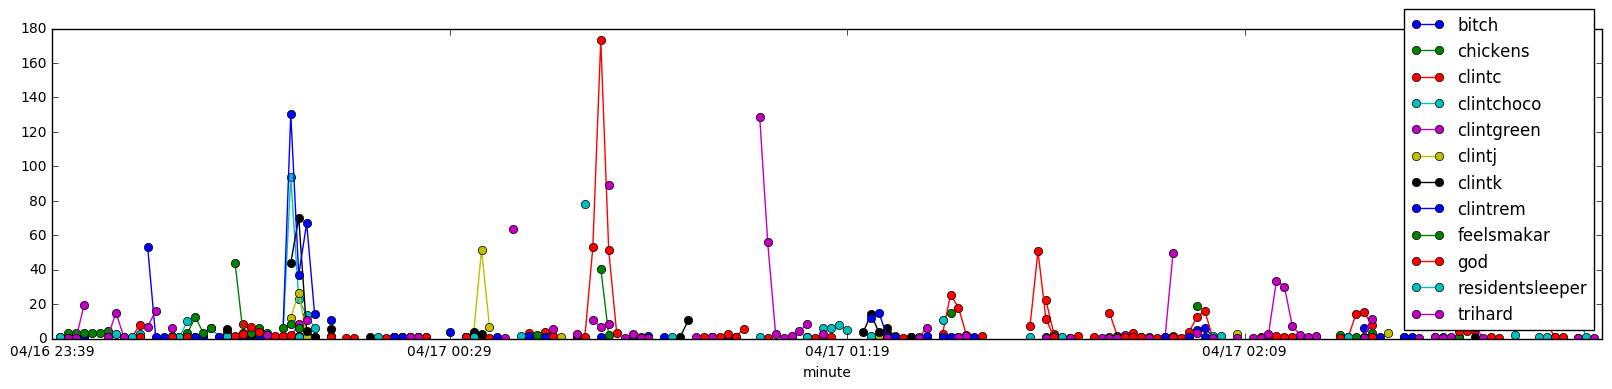

In [143]:
# Produces a wider array of topics to generalize
long = TFIDF.loc[:,(TFIDF>0).sum()>10]
long.loc[:,long.max()>40].plot(figsize=(20,4),legend=True, marker='o')

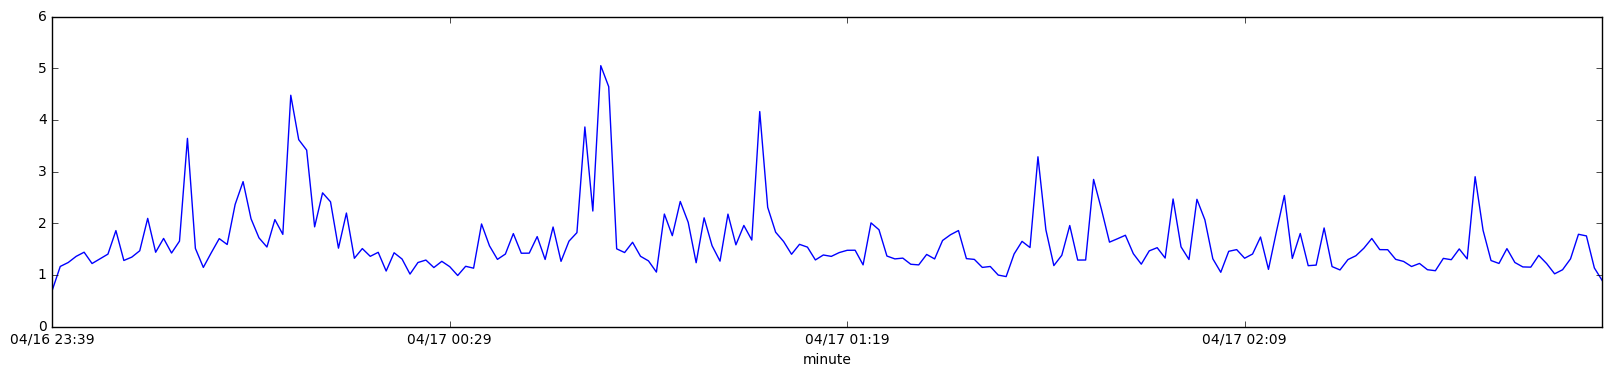

In [144]:
# Generates the boring periods within the timeframe of the stream
TFIDF.mean(axis=1).plot(figsize=(20,4),legend=False)

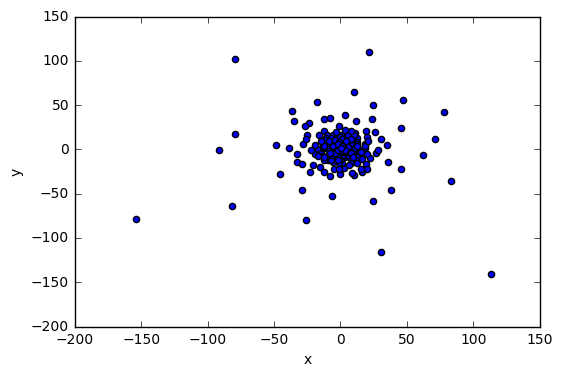

In [146]:
# Unusual time periods during the VOD
TFIDF2 = TFIDF.fillna(0.0)
import sklearn.manifold
mds = sklearn.manifold.MDS(n_components=2, dissimilarity='euclidean', \
                n_init=10, max_iter=1000)
dr = mds.fit_transform(TFIDF2)
dr = pd.DataFrame(dr, columns=['x','y'], index=TFIDF.index)
ax = dr.plot.scatter(x='x', y='y')